In [8]:
import pandas as pd
from prophet import Prophet

In [9]:
df = pd.read_csv('data/air_NO2_data_basel.csv', names=["ds", "y"], header=0)
df.head()

,ds,y
0,2000-01-01,41.934
1,2000-01-02,44.515
2,2000-01-03,57.342
3,2000-01-04,65.238
4,2000-01-05,64.973


In [10]:
m = Prophet()
m.fit(df)

18:53:01 - cmdstanpy - INFO - Chain [1] start processing
18:53:02 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods=12*25, freq='M')
future.tail()

/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
8453,2049-10-31
8454,2049-11-30
8455,2049-12-31
8456,2050-01-31
8457,2050-02-28


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8453,2049-10-31,27.858693,-69.080623,116.374784
8454,2049-11-30,50.678585,-42.560374,143.073274
8455,2049-12-31,47.851727,-47.192312,138.522009
8456,2050-01-31,53.046873,-43.827388,145.383568
8457,2050-02-28,53.868773,-40.895953,142.697782


/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


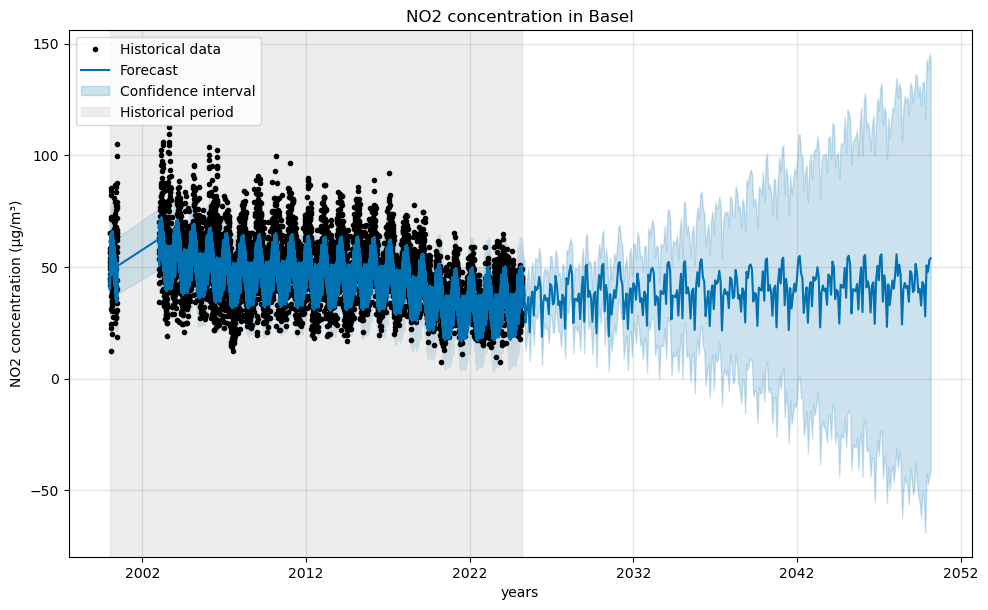

In [13]:
import matplotlib.pyplot as plt

cutoff = df['ds'].max()

fig1 = m.plot(forecast)
plt.xlabel("years") 
plt.ylabel("NO2 concentration (µg/m³)")  
plt.title("NO2 concentration in Basel")
plt.axvspan(forecast['ds'].min(), cutoff, color='lightgrey', alpha=0.4, label='Historical period')
plt.legend(["Historical data", "Forecast", "Confidence interval", "Historical period"], loc="upper left")

fig1.savefig('images/air_NO2_basel_forecast.png', dpi=300, bbox_inches='tight')

In [14]:
import os

output_path = os.path.join("prediction-results", "air_NO2_basel-predict.csv")

forecast.to_csv(output_path, index=False)

print(f"Saved predictions to: {output_path}")

Saved predictions to: prediction-results/air_NO2_basel-predict.csv
